In [660]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
import pandas as pd 
import numpy as np
import warnings
from sklearn import linear_model
#import seaborn as sns
#from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
%matplotlib inline 

In [661]:
source_data_file = pd.read_csv(r'raw-data\all-ops-2006-2013-extract-2.csv', parse_dates=['Date'], thousands=',', decimal='.')
#.dropna()

source_columns_list_initial = ['Executed','Date','Expense amount','Income amount']
#['Executed','Date','Income account','Income amount','Income balance','Expense account','Expense amount','Expense balance','Comment','Category','Agent']

source_columns_list_to_delete = ['Executed']

training_data_percentage = 0.75

In [662]:
#######################################
# vars setup/reset
# cleaning the variable
if 'my_data_frame' in locals():
  del my_data_frame  
if 'source_columns_list' in locals():
  del source_columns_list

source_columns_list = list (set(source_columns_list_initial) - set (source_columns_list_to_delete))  
print ('source_columns_list',source_columns_list)
#######################################

source_columns_list ['Date', 'Income amount', 'Expense amount']


In [663]:
#######################################
## Cleaning data to process ###########
# loading initial DataFrame 
my_data_frame = pd.DataFrame(source_data_file, columns= source_columns_list_initial ).replace(r'Света',r'Agent-1').replace(r'Вадим',r'Agent-2').replace(r'Архипп',r'Agent-3')
# .drop_duplicates(inplace = True) #.fillna('')
my_data_frame.info()

# dropping records with Executed != +my_data_frame.drop(my_data_frame[my_data_frame.Executed != '+'].index, inplace=True) 
my_data_frame.drop(columns = source_columns_list_to_delete , inplace=True) 
# exclude 2013 
my_data_frame.drop( my_data_frame[my_data_frame['Income amount'] >  150000 ].index, inplace=True) 
my_data_frame.drop( my_data_frame[my_data_frame['Expense amount'] <  -150000 ].index, inplace=True) 
my_data_frame.sort_values(by=['Date'])
#my_data_frame.drop( my_data_frame[my_data_frame['Date'] <  ???? ].index, inplace=True) 

#########################################
# lets visualise
        # my_data_frame.reindex(columns=['Income amount', 'Expense amount','Expense balance'])
        ## sns.pairplot(my_data_frame, x_vars=['Income amount', 'Expense amount','Expense balance'],y_vars='Date', size=4, aspect=1, kind='scatter')
        ## plt.show()
#########################################

#my_data_frame_size = int(my_data_frame.size / len(source_columns_list ))

#print ('DataFrame size = ' , my_data_frame_size)
#my_training_data_size = round (my_data_frame_size /100 * training_data_percentage ) 
#my_test_data_size = my_data_frame_size - my_training_data_size


#my_training_data = my_data_frame[0:my_training_data_size]
#my_training_data.head(my_training_data_size * len(source_columns_list ))
#my_test_data = my_data_frame[my_training_data_size:my_data_frame_size ]

#print ('my_training_data_size  = ' , my_training_data_size)
#print ('my_training_data.size  = ' , my_training_data.size)
#print ('my_test_data_size size = ' , my_test_data_size)
#print (my_training_data['Expense amount'].tail(3))
#print (my_test_data['Expense amount'].head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9661 entries, 0 to 9660
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Executed        9604 non-null   object        
 1   Date            9661 non-null   datetime64[ns]
 2   Expense amount  9037 non-null   float64       
 3   Income amount   1469 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 302.0+ KB


,Date,Expense amount,Income amount
0,2006-01-02 22:47:00,NaN,1500.00
1,2006-01-02 22:48:00,-690.0,NaN
2,2006-01-02 22:49:00,-15.0,NaN
3,2006-01-02 22:49:00,-76.0,NaN
78,2006-01-03 21:35:00,-81.8,NaN
...,...,...,...
9656,2012-12-30 20:33:00,-9200.0,9200.00
9657,2012-12-30 20:35:00,NaN,2.19
9658,2012-12-30 20:48:00,-125.4,NaN
9659,2012-12-31 20:48:00,-381.9,NaN


In [664]:
my_grouped_dataset = my_data_frame.groupby(pd.Grouper(key='Date',freq="M")).sum().sort_values(by=['Date'], ascending=True).copy()
############# Negative or positive???
# my_grouped_dataset['Expense amount'] = my_grouped_dataset['Expense amount'].abs()

#my_grouped_dataset.reset_index()
#################################
###  Lagged Expenses for further analysis 
#################################
#my_grouped_dataset['Expense amount lagged'] = my_grouped_dataset['Expense amount'].shift(1)

my_grouped_dataset_training, my_grouped_dataset_testing = train_test_split ( my_grouped_dataset, test_size=0.3)

## checking columns on the Dataframe
#col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(my_grouped_dataset_testing.columns)]
#print(col_mapping) # ['0:Expense amount', '1:Income amount']
#print(my_grouped_dataset_training['Expense amount'])


print(my_grouped_dataset_training.head(10))


            Expense amount  Income amount
Date                                     
2011-02-28      -235391.84      225794.00
2009-10-31      -245600.45      323052.26
2008-12-31      -201674.64      298154.05
2012-06-30      -490455.70      461369.04
2012-03-31      -240867.91      208643.54
2009-03-31      -126000.56       80743.00
2012-09-30      -123359.71      153862.49
2007-11-30      -136158.15      173196.95
2009-01-31      -457261.58      441365.67
2010-05-31      -335673.26      279527.50


<Figure size 432x288 with 0 Axes>

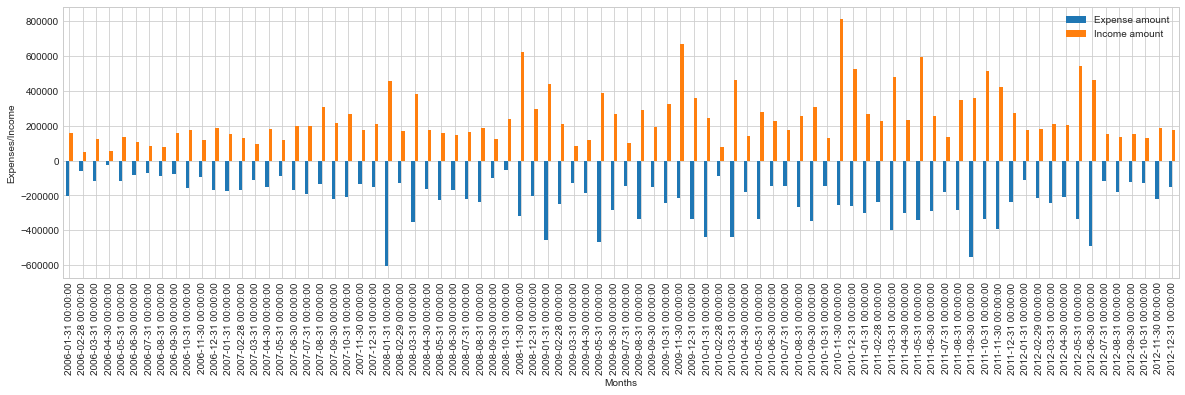

In [665]:
plt.clf()
my_grouped_dataset.sort_values(by=['Date']).plot(kind='bar',figsize = (20,5)) 
plt.xlabel("Months")
plt.ylabel("Expenses/Income")

plt.show()


In [666]:
X_train = my_grouped_dataset_training[['Income amount']] 
Y_train = my_grouped_dataset_training[['Expense amount']] 



regr_model = linear_model.LinearRegression()
regr_model.fit(X_train, Y_train)

print('Intercept: \n', regr_model.intercept_)
print('Coefficients: \n', regr_model.coef_)

# print('regr_model.predict(236606.02) = ',regr_model.predict([[515269.32]]))


Intercept: 
 [-107764.97022348]
Coefficients: 
 [[-0.46292018]]


In [667]:

#my_grouped_dataset_testing['Predicted Expense'] = my_grouped_dataset_testing.apply( lambda row: str(regr_model.predict([[ row['Income amount'] ]])) + ' for '+str(row['Income amount']) , axis = 1)

my_grouped_dataset_testing['Predicted Expense'] = my_grouped_dataset_testing.apply( lambda row: float(regr_model.predict([[ row['Income amount'] ]]))  , axis = 1)

#print(my_grouped_dataset_testing['Predicted Expense'].head (10))
print(my_grouped_dataset_testing.head (10))
#print (df_out)
    

            Expense amount  Income amount  Predicted Expense
Date                                                        
2010-09-30      -345956.07      308941.83     -250780.376421
2008-01-31      -604532.14      455659.28     -318698.844140
2012-11-30      -219360.30      184247.17     -193056.702516
2008-07-31      -217623.61      161877.56     -182701.358726
2008-05-31      -223610.37      158159.35     -180980.124300
2006-04-30       -24330.50       57001.00     -134151.883154
2007-02-28      -166944.70      128499.00     -167249.749869
2006-12-31      -169264.86      187275.93     -194458.776627
2008-03-31      -353198.17      378877.13     -283154.837778
2006-05-31      -117575.23      134408.15     -169985.214625


<Figure size 432x288 with 0 Axes>

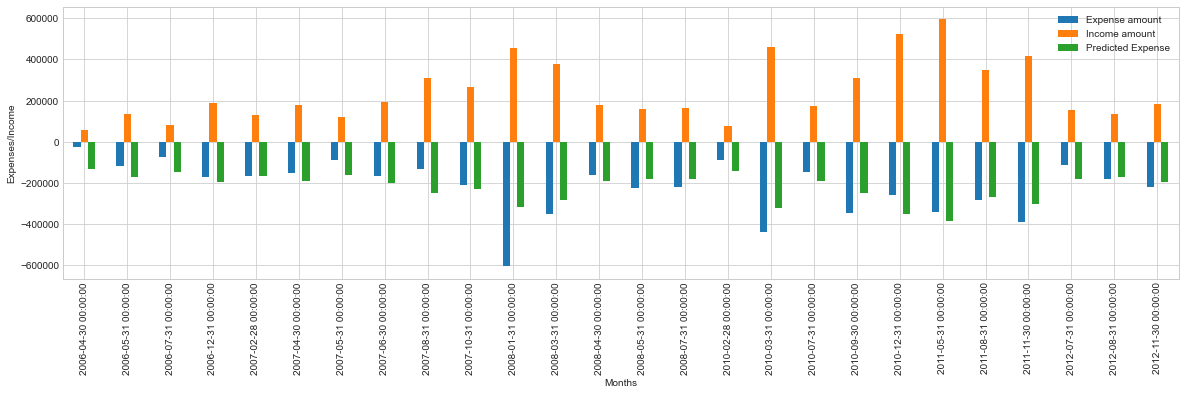

In [668]:
plt.clf()
my_grouped_dataset_testing.sort_values(by=['Date']).plot(kind='bar',figsize = (20,5)) 
plt.xlabel("Months")
plt.ylabel("Expenses/Income")

plt.show()

In [669]:
# Compute the root-mean-square

rms = np.sqrt(mean_squared_error(my_grouped_dataset_testing[['Expense amount']] , my_grouped_dataset_testing[['Predicted Expense']]))
print(rms)
# 171995.66316816062

84506.40951475048
